# COVID-19: th

Libraries and Plotting Settings

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':'tight'}

In [3]:
sns.set_context("poster")

plt.rcParams["figure.figsize"] = (12,8) 
plt.rcParams["figure.dpi"] = 300

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


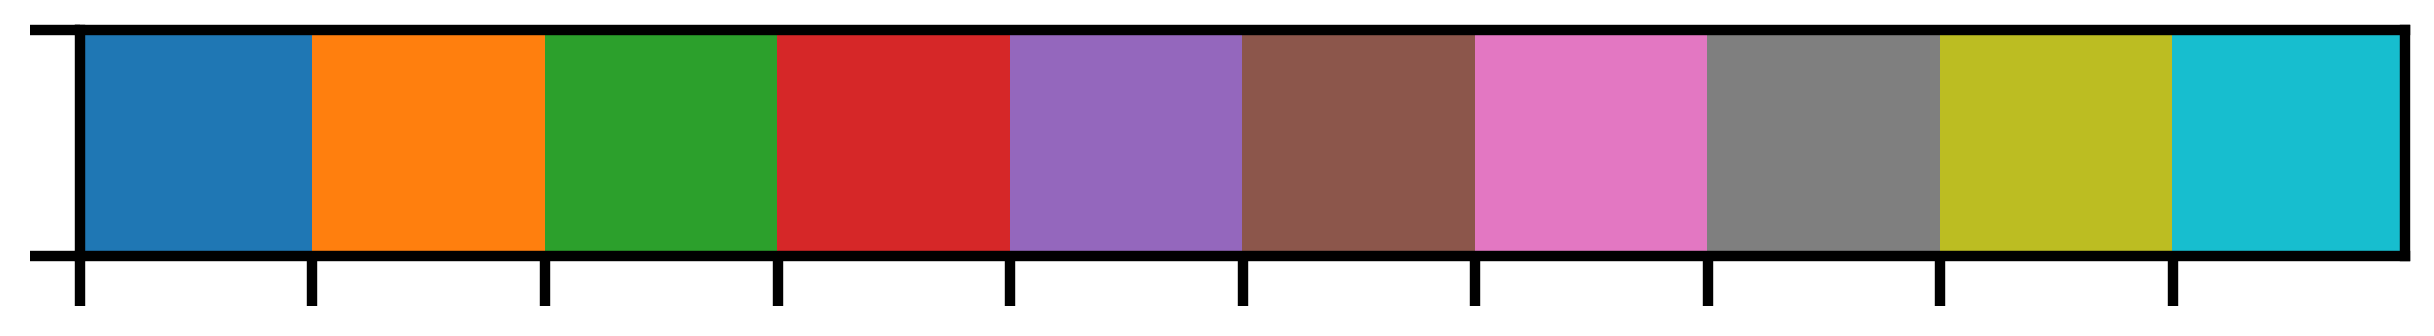

In [5]:
pal = sns.color_palette()

sns.palplot(pal)
print(pal.as_hex())

Loading data from `https://github.com/pcm-dpc/COVID-19` (Italian Protezione Civile official GitHub repository)

In [4]:
PATH = "../COVID-19/dati-andamento-nazionale/"
FILE = "dpc-covid19-ita-andamento-nazionale.csv"

In [13]:
df = pd.read_csv(PATH+FILE, sep=',')

In [14]:
df['casi_conclusi'] = df['deceduti']+df['dimessi_guariti']

In [15]:
df.head()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_conclusi
0,2020-02-24 18:00:00,ITA,101,26,127,94,221,221,1,7,229,4324,8
1,2020-02-25 18:00:00,ITA,114,35,150,162,311,90,1,10,322,8623,11
2,2020-02-26 18:00:00,ITA,128,36,164,221,385,74,3,12,400,9587,15
3,2020-02-27 18:00:00,ITA,248,56,304,284,588,203,45,17,650,12014,62
4,2020-02-28 18:00:00,ITA,345,64,409,412,821,233,46,21,888,15695,67


# Analysis

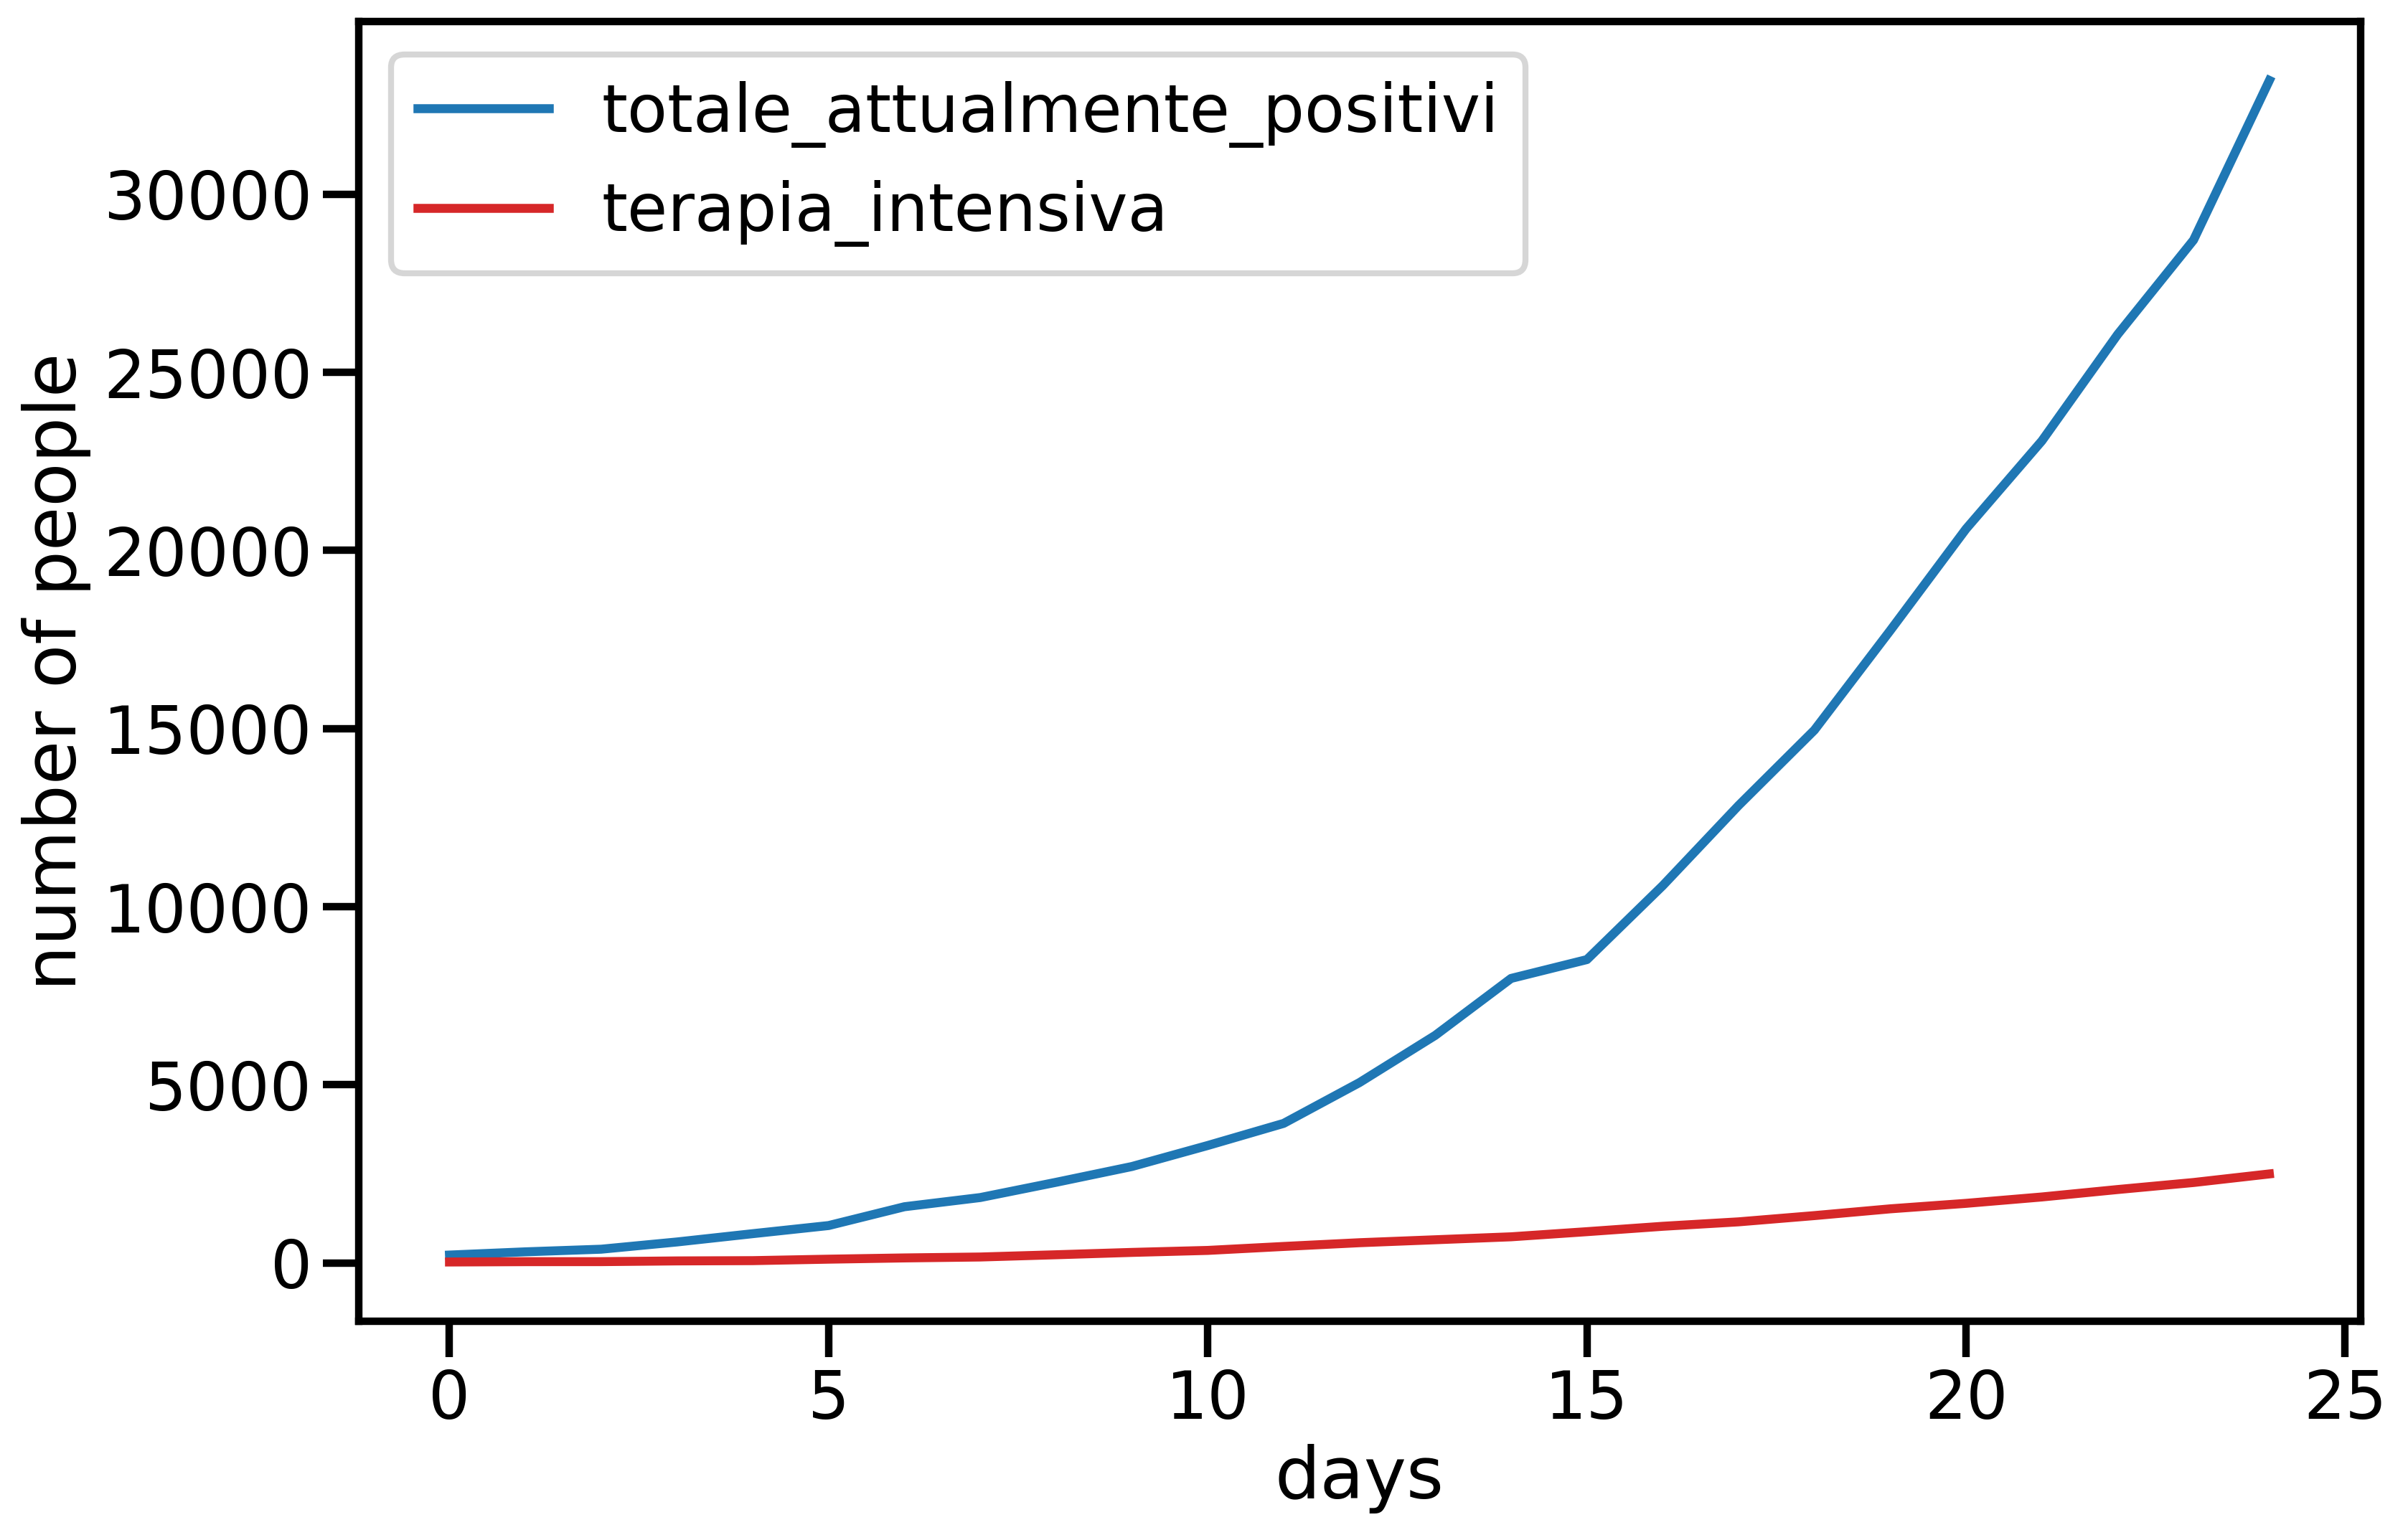

In [10]:
df['totale_attualmente_positivi'].plot(label='totale_attualmente_positivi')
df['terapia_intensiva'].plot(label='terapia_intensiva', color='#d62728')

plt.xlabel('days')
plt.ylabel('number of people')

plt.legend()

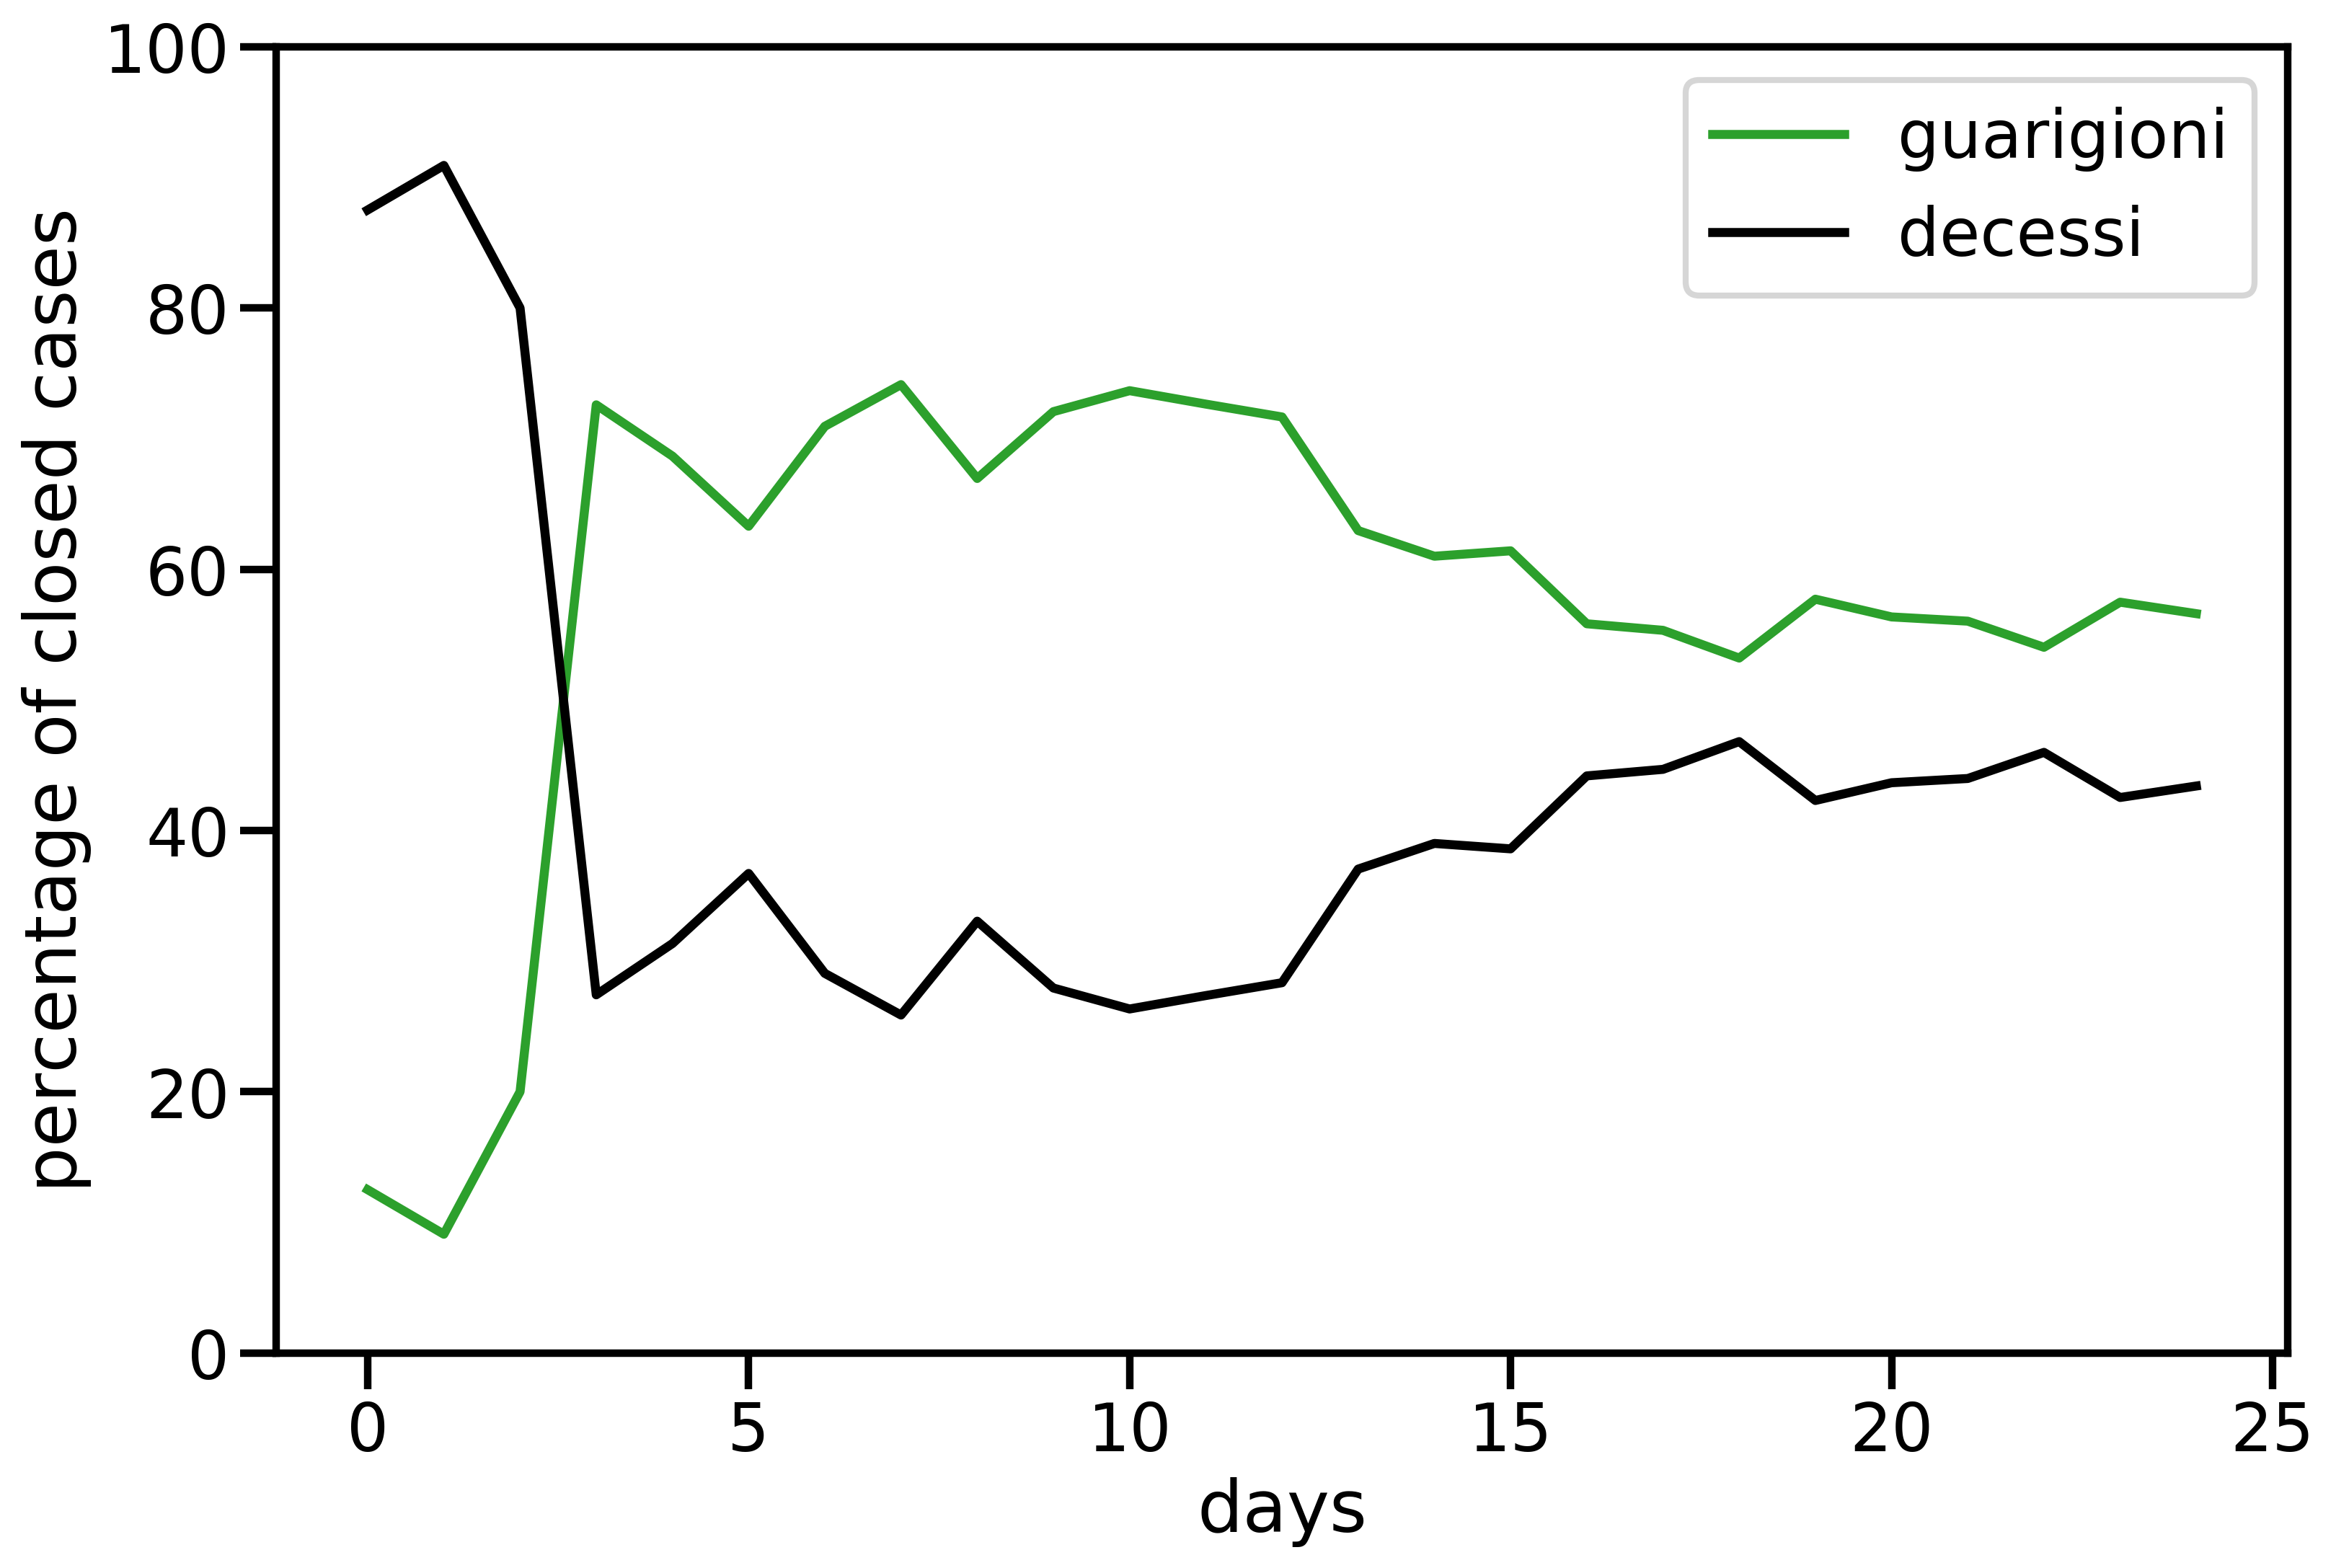

In [11]:
plt.plot((df['dimessi_guariti']/df['casi_conclusi'])*100, label='guarigioni', color='#2ca02c')
plt.plot((df['deceduti']/df['casi_conclusi'])*100, label='decessi', color='black')
plt.ylim(0,100)

plt.xlabel('days')
plt.ylabel('percentage of closed cases')

plt.legend()

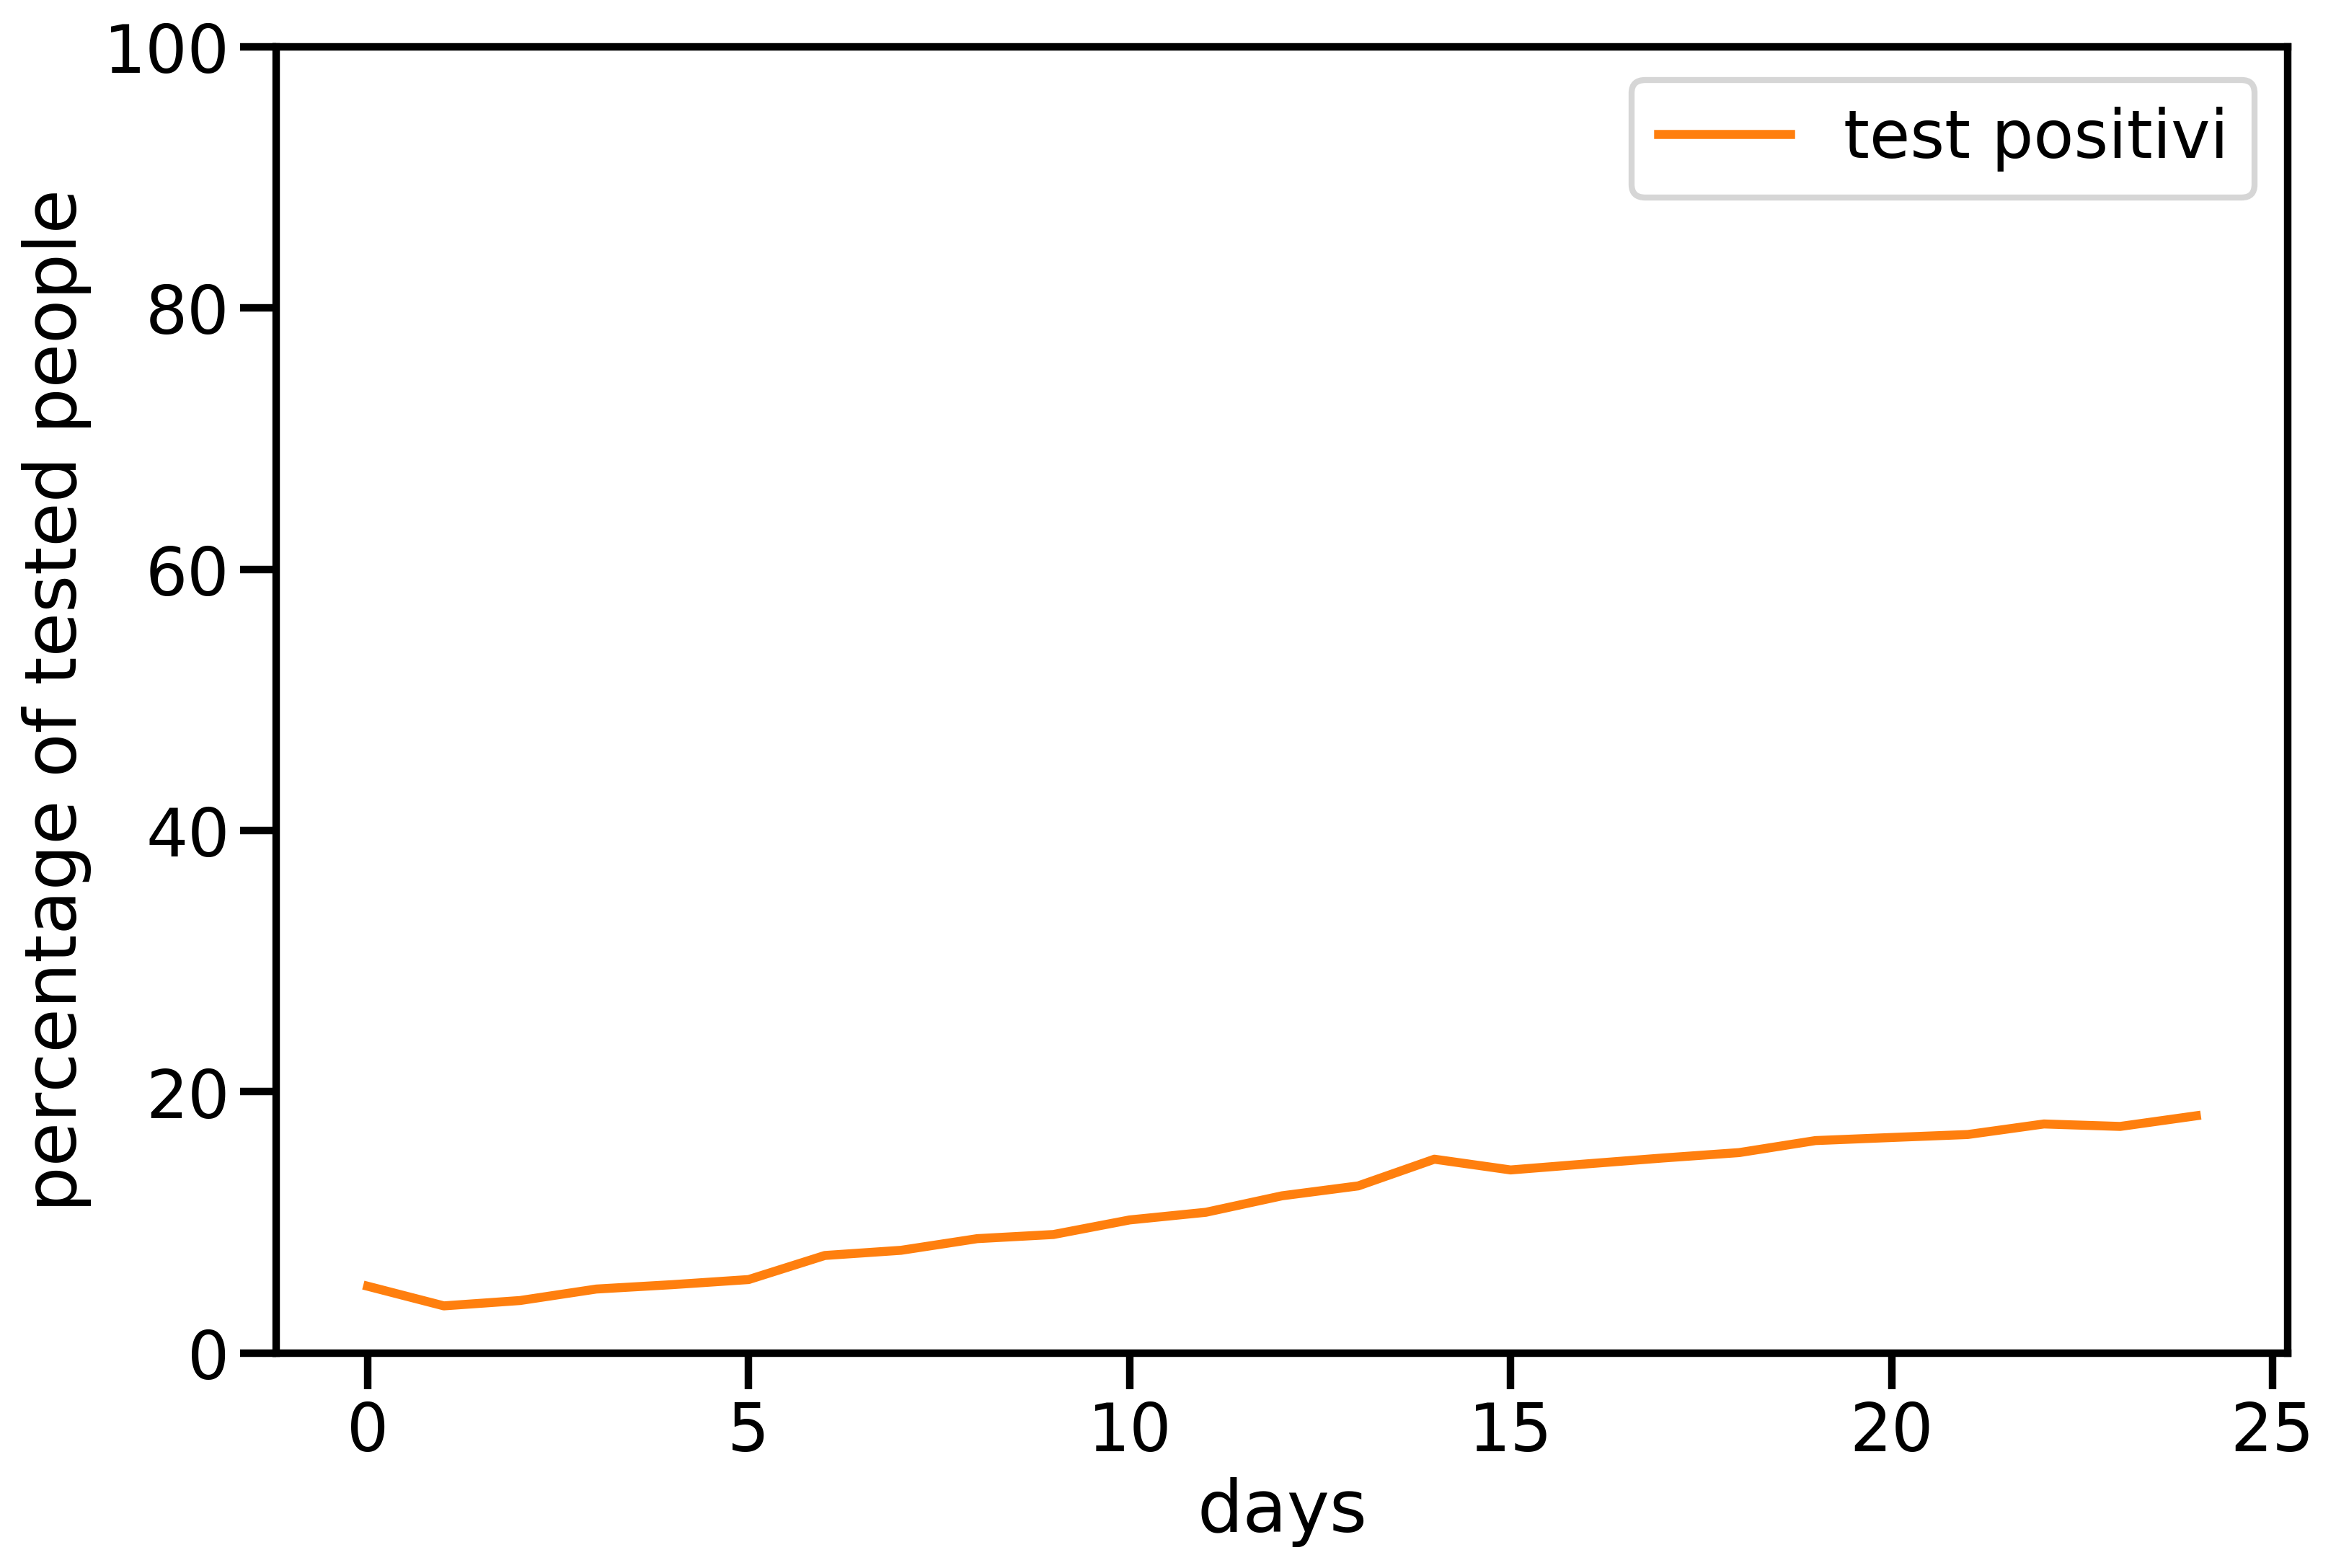

In [12]:
plt.plot((df['totale_attualmente_positivi']/df['tamponi'])*100, label='test positivi', color='#ff7f0e')

plt.ylim(0,100)

plt.xlabel('days')
plt.ylabel('percentage of tested people')

plt.legend()